# Pokemon dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
poke = pd.read_csv('Pokemon.csv')

In [3]:
poke.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Descriptive statistics

In [16]:
array = [['Total', poke['Total'].mean(), poke['Total'].median(), poke['Total'].std()], ['HP', poke['HP'].mean(), poke['HP'].median(), poke['HP'].std()], ['Attack', poke['Attack'].mean(), poke['Attack'].median(), poke['Attack'].std()]]
display(pd.DataFrame(array, columns  = ['name', 'mean', 'median', 'std']))

,name,mean,median,std
0,Total,435.10250,450.0,119.963040
1,HP,69.25875,65.0,25.534669
2,Attack,79.00125,75.0,32.457366


#### Here we can see some statistics performed

# Data Cleanup

In [17]:
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [18]:
pd.isnull(poke).sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [21]:
poke['Type 2'] = poke['Type 2'].fillna('')
pd.isnull(poke).sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [64]:
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


# Overview

# Now I'm going to visualize some plots to show a dependence of ''Defence'' on ''Attack''.

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

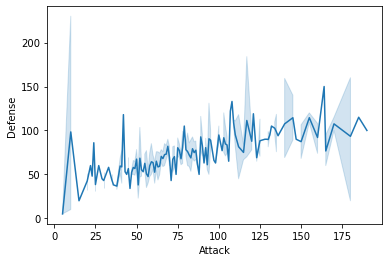

In [120]:
sns.lineplot(data = poke, x = 'Attack', y = 'Defense')

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

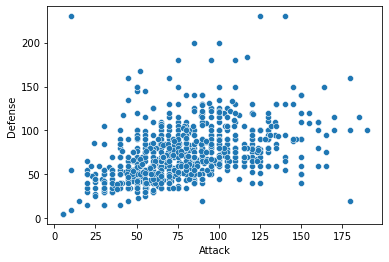

In [121]:
sns.scatterplot(data = poke, x = 'Attack', y = 'Defense')

# We need a graph of ''Total" just to understand a dataset better.

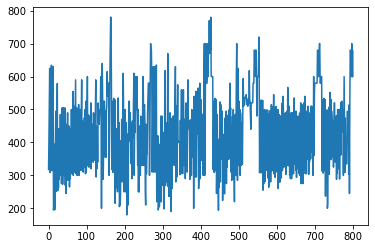

In [127]:
plt.plot(poke['Total'])

## 1) Who is the most powerfull Pokemon in total?

In [31]:
poke['Name'][poke['Total'].idxmax()]

'MewtwoMega Mewtwo X'

#### I thought it would be a Pikachu

## 2) I suppose that the strongest Pokemon is legendary.

In [67]:
poke['Legendary'][poke['Total'].idxmax()]

True

####  Well, that's pretty cool.

## 3) I think that the weakest Pokemon type is ,,Grass''.

In [70]:
poke['Type 1'][poke['Total'].idxmin()]

'Grass'

#### Well, it was a correct guess.

## 4) The strongest Pokemon is ,,Fire'' type.

In [71]:
poke['Type 1'][poke['Total'].idxmax()]

'Psychic'

####  I'm surprised, but later i will prove it.

## On a barplot below I decided to check, who has higher total statistics. Legendary or not Legendary?

<AxesSubplot:xlabel='Legendary', ylabel='Total'>

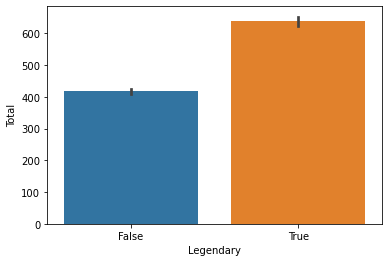

In [83]:
sns.barplot(data = poke, x = 'Legendary', y = 'Total')

#### As we can see, the statistics of a Legendary Pokemon is nearly 2 times the results of a non-legendary one

## Now I want to add a pie-diagram, just to see to percentage of the legendary Pokemons

Text(0.5, 1.0, 'Legendariness')

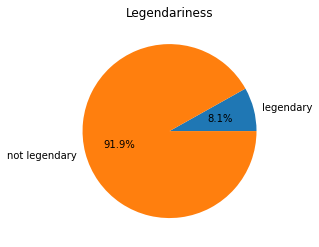

In [86]:
legend = [0, 0]
for i in list(poke['Legendary']):
    if i == 1:
        legend[0] += 1
    else:
        legend[1] += 1        
plt.pie(legend, labels = ['legendary', 'not legendary'], autopct = '%1.1f%%')
plt.title('Legendariness')

#### According to the diagram, we can see, that less then 10% of all Pokemons are legendary (a game changer)

# Hypothesis 

### I think that legendary Pokemons are only higher generations.

Text(0.5, 1.0, 'Percentage of each generation among legendary Pokemons')

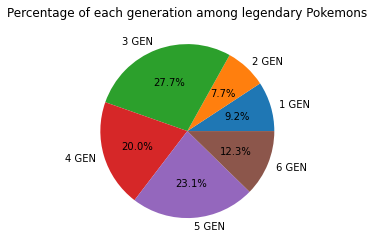

In [106]:
mas = [0] * 6
array = poke.index[poke['Legendary'] == True].tolist()
for i in array:
    mas[(poke['Generation'][i]) - 1] += 1
plt.pie(mas, labels = ['1 GEN', '2 GEN', '3 GEN', '4 GEN', '5 GEN', '6 GEN'], autopct = '%1.1f%%')
plt.title('Percentage of each generation among legendary Pokemons')

#### As we can see, most of legendary Pokemons are Third Gen. So we understand that there is no logic...

### In that case I decided to check whether legendary Pokemons are connected with there statistics.

Text(0.5, 1.0, 'Percentage of each type among legendary Pokemons')

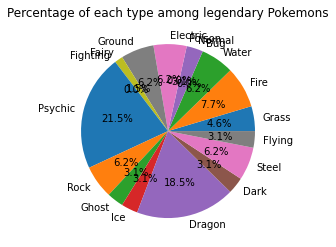

In [126]:
arrayType1 = list(poke['Type 1'].unique())
mas = [0] * len(arrayType1)
for i in array:
    mas[arrayType1.index(poke['Type 1'][i])] += 1
plt.pie(mas, labels = arrayType1, autopct = '%1.1f%%')
plt.title('Percentage of each type among legendary Pokemons')

## According to this two pie-charts, we can admit, that legendary Pokemons are mostly Third Generation and Psychic type